In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px

# Data Analysis

## Load Training Data 

In [2]:
train_df = pd.read_csv('/Users/alexis/Cranfield/AI/assignment/data/train.csv')
print("Train data shape:", train_df.shape)
train_df.head()

Train data shape: (51953, 8)


,image_id,class_name,rad_id,x_min,y_min,x_max,y_max,class_id
0,8138c0bc649a534f449cf703475528ec,Cardiomegaly,R9,835.0,1298.0,1863.0,1662.0,3
1,e8e6ff19c3be05a4ccfb20abc4202d52,Pleural thickening,R10,1768.0,360.0,2130.0,532.0,11
2,de6d6efd88431d3253198106bb070471,No finding,R8,NaN,NaN,NaN,NaN,14
3,01ee6e560f083255a630c41bba779405,Pulmonary fibrosis,R8,1396.0,398.0,1523.0,567.0,13
4,da668869900c862ce12bd06fde5feb8d,Pulmonary fibrosis,R9,1780.0,347.0,2467.0,1246.0,13


## Distribution of the number of images per class

In [3]:
# Number of images per label
label_counts = train_df['class_id'].value_counts()
label_counts = label_counts.sort_index()
label_counts

class_id
0      5479
1       213
2       734
3      4152
4       426
5       765
6       954
7      1899
8      1974
9      1685
10     1894
11     3704
12      173
13     3561
14    24340
Name: count, dtype: int64

In [4]:
class_counts = train_df["class_id"].value_counts()

fig = px.bar(
    class_counts,
    x=class_counts.index,
    y=class_counts.values,
    log_y=True,
    color=class_counts.index

).update_layout(
    title="Number of annotations per class",
    xaxis_title="Class ID",
    yaxis_title="Number of observations",
).update_xaxes(categoryorder='total descending')
fig.show()

In [5]:
from collections import Counter

train_counter = Counter()
for class_id in train_df['class_id']:
    train_counter.update([class_id])

print("Number of classes:", len(train_counter))
print("Number of unique images:", train_df['image_id'].nunique())
print("Minimum number of images per class:", min(train_counter.values()))
print("Maximum number of images per class:", max(train_counter.values()))
print("Average number of images per class:", sum(train_counter.values()) / len(train_counter))

Number of classes: 15
Number of unique images: 14829
Minimum number of images per class: 173
Maximum number of images per class: 24340
Average number of images per class: 3463.5333333333333


## Zero-rule baseline (majority class classifier)

In [6]:
majority_class = train_counter.most_common(1)[0]
print("Majority class:", majority_class[0])

baseline_acc = majority_class[1] / sum(train_counter.values())
print("Accuracy when always predicting the majority class:")
print(f"{baseline_acc:.2f} ({baseline_acc*100:.2f}%)")

Majority class: 14
Accuracy when always predicting the majority class:
0.47 (46.85%)


## Number of bounding boxes per image

In [7]:
# Number of labels per image

image_label_counts = train_df['image_id'].value_counts()
image_label_counts = image_label_counts.sort_values(ascending=False)

print("Number of images with multiple labels:", (image_label_counts > 1).sum())
print("Maximum number of labels per image:", image_label_counts.max())
print("Average number of labels per image:", image_label_counts.mean())
print("Median number of labels per image:", image_label_counts.median())

Number of images with multiple labels: 13417
Maximum number of labels per image: 44
Average number of labels per image: 3.503472924674624
Median number of labels per image: 3.0


## Radiologists

In [8]:
# Number of images labeled per radiologist

radiologist_counts = train_df['rad_id'].value_counts()
radiologist_counts = radiologist_counts.sort_values(ascending=False)
radiologist_counts

rad_id
R9     11944
R10    10172
R8      9331
R2      2414
R5      2125
R3      1748
R6      1571
R1      1535
R13     1407
R15     1385
R7      1357
R16     1347
R12     1344
R11     1280
R14     1209
R4      1162
R17      622
Name: count, dtype: int64

In [9]:
fig = px.bar(
    radiologist_counts,
    x=radiologist_counts.index,
    y=radiologist_counts.values,
    log_y=True,
    color=radiologist_counts.index,
).update_layout(
    title="Number of annotations per radiologist",
    xaxis_title="Radiologist ID",
    yaxis_title="Number of observations",
)
fig.show()

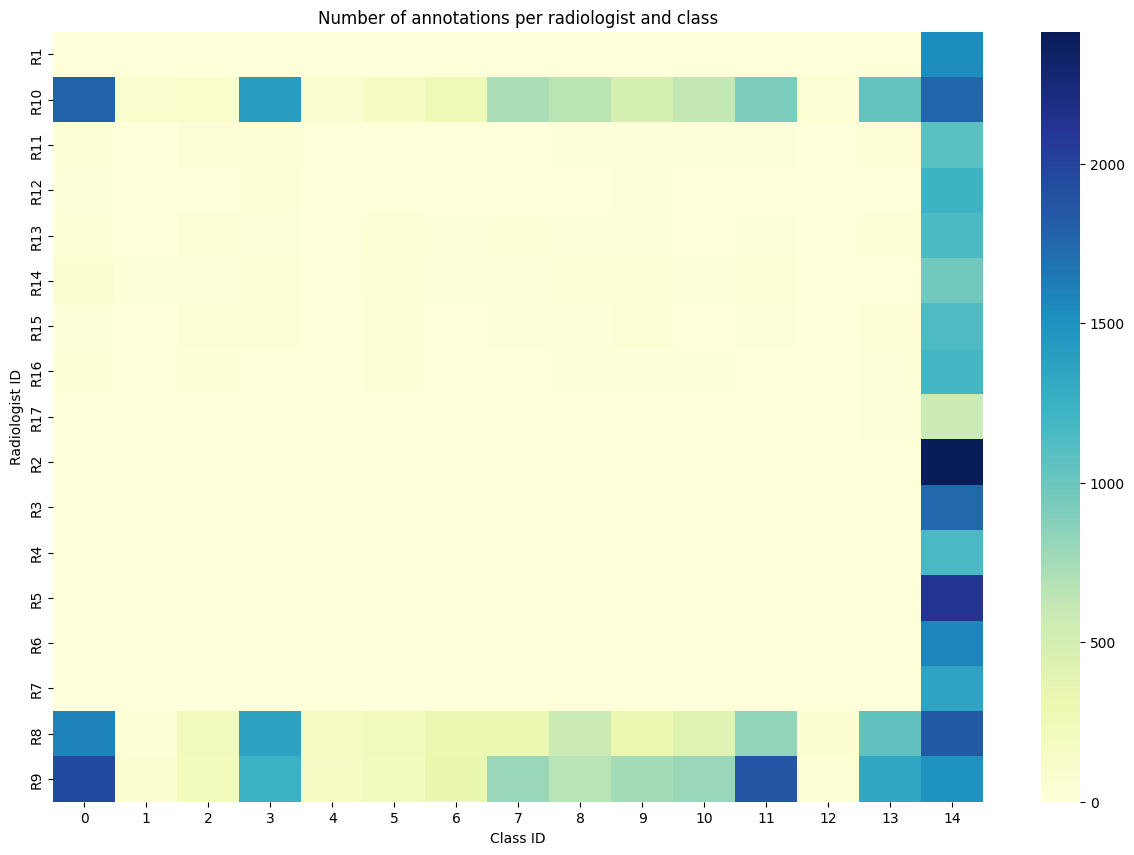

In [10]:
# DISTRIBUTION OF CLASS LABEL ANNOTATIONS BY RADIOLOGIST

radiologist_class_counts = train_df.groupby('rad_id')['class_id'].value_counts()

radiologist_class_counts = radiologist_class_counts.unstack(fill_value=0)

fig, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(radiologist_class_counts, ax=ax, cmap="YlGnBu")
ax.set_title("Number of annotations per radiologist and class")
ax.set_xlabel("Class ID")
ax.set_ylabel("Radiologist ID")
plt.show()